# Text Classification 

Supervised ML technique used for classificatio of textual data set into certain categories.Focus will be on claissifying the content accurately based on certain hyperparameters using powerfull classification modelling techniques as Logistic, Tree based algorith, Naive bayes, KNN etc. We will restrict our algorithm approach to ML only.

Steps involved with the below work flow:

* Defining problem statement and process.
* Data Gathering (.txt,.json files from different sources)
* Data Preparation 
* EDA - Exploratory data analysis to study the patterns and relation between text.
* Feature engineering 
* Model building 

## 1. Defining problem statement and process.
We will use BBC data set which has labels and try to learn and gather pattern in the text.

## 2.Data Gathering (.txt,.json files from different sources)
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Class Labels: 5 (business, entertainment, politics, sport, tech)

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os
display(os.getcwd())
os.chdir('/Users/ankitpatel/Downloads/nlp-in-python-tutorial-master/Text_classification/')

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

'/Users/ankitpatel/Downloads/nlp-in-python-tutorial-master/Text_classification'

In [6]:
import os
display(os.getcwd())
os.chdir('/Users/ankitpatel/Downloads/nlp-in-python-tutorial-master/Text_classification/')
os.listdir()

['.DS_Store', 'bbc']

In [143]:
## iterate through the folder to read the text 
df={}
path='./bbc'
list=['business','entertainment','politics','sport','tech']
for l in range(0,len(list)):
    input=[]
    getpath=path+'/'+list[l]
    for i in range(0,len(os.listdir(path=path+'/'+list[l]+'/'))):
        with open(path+'/'+list[l]+'/'+os.listdir(path=getpath)[i],'rb') as f:
            input.append(f.read())
    df[list[l]]=input
    del input

In [144]:
display(len(df['business']))
display(len(df['entertainment']))
display(len(df['politics']))
display(len(df['sport']))
display(len(df['tech']))

510

386

417

511

401

In [145]:
len(df.items())

5

In [176]:
## store the data from dictionary to database
data = pd.DataFrame([(i, text) for i,j in df.items() for text in j], 
                  columns=['cat','text'])
print(data)

           cat                                               text
0     business  b'UK economy facing \'major risks\'\n\nThe UK ...
1     business  b'Aids and climate top Davos agenda\n\nClimate...
2     business  b'Asian quake hits European shares\n\nShares i...
3     business  b'India power shares jump on debut\n\nShares i...
4     business  b"Lacroix label bought by US firm\n\nLuxury go...
...        ...                                                ...
2220      tech  b'Warning over Windows Word files\n\nWriting a...
2221      tech  b'Fast lifts rise into record books\n\nTwo hig...
2222      tech  b'Nintendo adds media playing to DS\n\nNintend...
2223      tech  b"Fast moving phone viruses appear\n\nSecurity...
2224      tech  b'Hacker threat to Apple\'s iTunes\n\nUsers of...

[2225 rows x 2 columns]


In [177]:
data.cat.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: cat, dtype: int64

## 3.EDA - Exploratory data analysis 

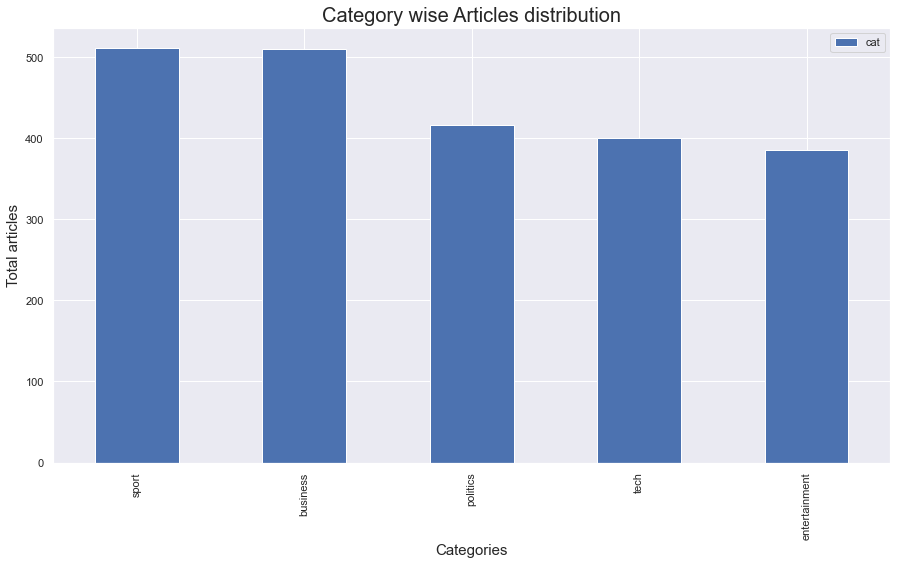

In [201]:
## plot by cat
plt.figure(figsize=(15,8))
data.cat.value_counts().plot.bar()
sns.set()
plt.xlabel('Categories',fontdict={'fontsize':15})
plt.ylabel('Total articles',fontdict={'fontsize':15})
plt.title('Category wise Articles distribution',fontdict={'fontsize':20})
plt.legend()

We can see the proportion of articles across the categories are more or like equal 

In [ ]:
## look at the records
pd.set_option('display.max_rows',1000)
data.head(1000)

In [204]:
data.to_pickle("data.pkl")

In [228]:
## subset data except sport 
data_sub=data[data['cat'].isin(['business','entertainment','politics','tech'])]
data_sub['text']=data_sub['text'].str.decode('utf-8')

In [229]:
data_sub

cat                                               text
0     business  UK economy facing 'major risks'\n\nThe UK manu...
1     business  Aids and climate top Davos agenda\n\nClimate c...
2     business  Asian quake hits European shares\n\nShares in ...
3     business  India power shares jump on debut\n\nShares in ...
4     business  Lacroix label bought by US firm\n\nLuxury good...
...        ...                                                ...
2220      tech  Warning over Windows Word files\n\nWriting a M...
2221      tech  Fast lifts rise into record books\n\nTwo high-...
2222      tech  Nintendo adds media playing to DS\n\nNintendo ...
2223      tech  Fast moving phone viruses appear\n\nSecurity f...
2224      tech  Hacker threat to Apple's iTunes\n\nUsers of Ap...

[1714 rows x 2 columns]

In [230]:
## Category wise length of articles distributions using box plots 
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)## remove number \w contains word followed by \d which means disgits followed by \w
    text = re.sub('\n',' ',text)## remove next line characters
    text = re.sub('[‘’“”…]', '', text) ## remove dots,quotes 
    return text

round1 = lambda x: clean_text_round1(x)

In [231]:
# Let's take a look at the updated text
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
data_sub['text']=data_sub['text'].map(round1)

In [232]:
data_sub.head(100)

cat                                               text
0   business  uk economy facing major risks  the uk manufact...
1   business  aids and climate top davos agenda  climate cha...
2   business  asian quake hits european shares  shares in eu...
3   business  india power shares jump on debut  shares in in...
4   business  lacroix label bought by us firm  luxury goods ...
5   business  insurance bosses plead guilty  another three u...
6   business  turkeyiran mobile deal at risk  turkeys invest...
7   business  parmalat to return to stockmarket  parmalat th...
8   business  worldcom director admits lying  the former chi...
9   business  ebbers denies worldcom fraud  former worldcom ...
10  business  qantas sees profits fly to record  australian ...
11  business  saudi investor picks up the savoy  londons fam...
12  business  euronext poised to make lse bid  paneuropean g...
13  business  cactus diet deal for phytopharm  a slimming ai...
14  business  wall street cool to ebays profit  shares in on...
15  business  parmalat founder offers apology  the founder a...
16  business  golden economic period to end  ten years of go...
17  business  brazil plays down varig rescue  the brazilian ...
18  business  worldcom trial starts in new york  the trial o...
19  business  tsunami slows sri lankas growth  sri lankas pr...
20  business  christmas shoppers flock to tills  shops all o...
21  business  iraq to invite phone licence bids  iraq is to ...
22  business  australia rates at four year high  australia i...
23  business  glaxo aims high after profit fall  glaxosmithk...
24  business  bmw cash to fuel mini production  less than fo...
25  business  eu ministers to mull jet fuel tax  european un...
26  business  further rise in uk jobless total  the uks jobl...
27  business  turkey turns on the economic charm  three year...
28  business  china now top trader with japan  china overtoo...
29  business  splitcaps pay £ compensation  investors who lo...
30  business  ge sees excellent world economy  us behemoth g...
31  business  five million germans out of work  germanys une...
32  business  booming markets shed few tears  the market for...
33  business  uk economy ends year with spurt  the uk econom...
34  business  bush budget seeks deep cutbacks  president bus...
35  business  metlife buys up citigroup insurer  us banking ...
36  business  china had role in yukos splitup  china lent ru...
37  business  cars pull down us retail figures  us retail sa...
38  business  us insurer marsh cuts  jobs  up to  jobs are t...
39  business  car giant hit by mercedes slump  a slump in pr...
40  business  millions go missing at china bank  two senior ...
41  business  european losses hit gms profits  general motor...
42  business  libya takes  in unfrozen funds  libya has with...
43  business  sn extends indian beer venture  the uks bigges...
44  business  two nigerian banks set to merge  nigerian bank...
45  business  house prices drop as sales slow  house prices ...
46  business  bush to get tough on deficit  us president geo...
47  business  yukos unit fetches  at auction  a littleknown ...
48  business  china suspends  power projects  china has orde...
49  business  high fuel costs hit us airlines  two of the la...
50  business  jj agrees  guidant deal  pharmaceutical giant ...
51  business  china aviation seeks rescue deal  scandalhit j...
52  business  japan bank shares up on link talk  shares of s...
53  business  us company admits benin bribery  a us defence ...
54  business  wembley firm wont make a profit  shares in mul...
55  business  palestinian economy in decline  despite a shor...
56  business  europe blames us over weak dollar  european le...
57  business  survey confirms property slowdown  government ...
58  business  asia shares defy postquake gloom  indonesian i...
59  business  trial begins of spains top banker  the trial o...
60  business  google shares fall as staff sell  shares in go...
61  business  s korea spending boost to e

In [233]:
data_sub['Length']=data_sub['text'].str.len()

In [ ]:
data_sub.head(100)

<Figure size 1440x576 with 0 Axes>

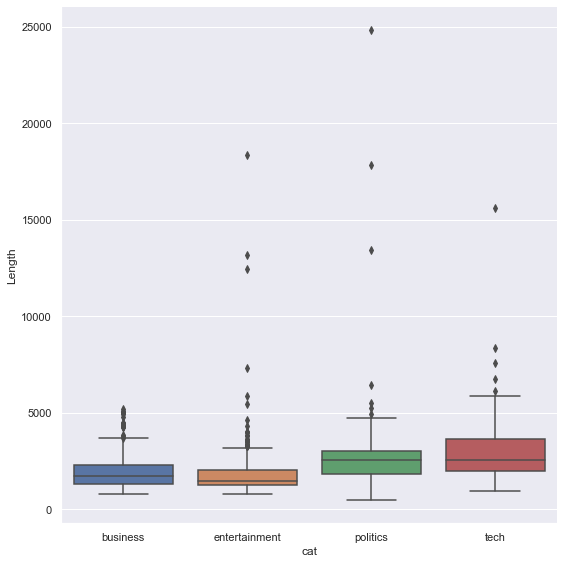

In [234]:
## Distribution - box plots :
plt.figure(figsize=(20,8))
sns.set()
sns.catplot(x='cat',y='Length',data=data_sub,kind='box',height=8,aspect=1)

The median length of text across the categories is more or like similar with every category having text length following close to symmetric distribution.
Although Politics and tech catgories seems to have text of longer length.

In [235]:
## store the clean data into pickle file 
#os.getcwd()
data_sub.to_pickle("data_sub.pkl")

## 4. Feature Engineering

Creating features from the text using various text to numeric data conversion forms.
* words to count vectors : Each words of the document to act as a column label and their count across each document as a vector
* TF-IDF : term frequency - TF-IDF is a score that represents the relative importance of a term in the document and the entire corpus.
The above two techniques are commonly knows as BOW(Bag of words) where relative order of the words are not captures hence result in understanding the semantics.

We will focus on Topic modeling where each topic is represented as probabilistic distributions across the document and each term/word is represented as probabilistic distribution across the words

We will represent the document in the form of Tf-idf whcih has N-grams , minimumDF,maximumdf and max features as paramemters


The next step is to create features from the raw text so we can train the machine learning models. The steps followed are:

* Text Cleaning and Preparation: cleaning of special characters, downcasing, punctuation signs. possessive pronouns and stop words removal and lemmatization.
* Label coding: creation of a dictionary to map each category to a code.
* Train-test split: to test the models on unseen data.
* Text representation: use of TF-IDF scores to represent text.

### Cleaning the white space characters 

In [236]:
data_sub['text'] = data_sub['text'].str.replace("\r", " ")

In [237]:
data_sub.loc[0]['text']

'uk economy facing major risks  the uk manufacturing sector will continue to face serious challenges over the next two years the british chamber of commerce bcc has said  the groups quarterly survey of companies found exports had picked up in the last three months of  to their best levels in eight years the rise came despite exchange rates being cited as a major concern however the bcc found the whole uk economy still faced major risks and warned that growth is set to slow it recently forecast economic growth will slow from more than  in  to a little below  in both  and   manufacturers domestic sales growth fell back slightly in the quarter the survey of  firms found employment in manufacturing also fell and job expectations were at their lowest level for a year  despite some positive news for the export sector there are worrying signs for manufacturing the bcc said these results reinforce our concern over the sectors persistent inability to sustain recovery the outlook for the service

### Lowercase conversion

In [238]:
data_sub['text'] = data_sub['text'].str.lower()

In [239]:
data_sub.loc[0]['text']

'uk economy facing major risks  the uk manufacturing sector will continue to face serious challenges over the next two years the british chamber of commerce bcc has said  the groups quarterly survey of companies found exports had picked up in the last three months of  to their best levels in eight years the rise came despite exchange rates being cited as a major concern however the bcc found the whole uk economy still faced major risks and warned that growth is set to slow it recently forecast economic growth will slow from more than  in  to a little below  in both  and   manufacturers domestic sales growth fell back slightly in the quarter the survey of  firms found employment in manufacturing also fell and job expectations were at their lowest level for a year  despite some positive news for the export sector there are worrying signs for manufacturing the bcc said these results reinforce our concern over the sectors persistent inability to sustain recovery the outlook for the service

### Removing possessive pronouns

In [240]:
 data_sub['text'] = data_sub['text'].str.replace("'s", "")

In [241]:
## Removing double space to single space 
data_sub['text']=data_sub['text'].str.replace("  "," ")

In [242]:
data_sub.loc[0]['text']

'uk economy facing major risks the uk manufacturing sector will continue to face serious challenges over the next two years the british chamber of commerce bcc has said the groups quarterly survey of companies found exports had picked up in the last three months of to their best levels in eight years the rise came despite exchange rates being cited as a major concern however the bcc found the whole uk economy still faced major risks and warned that growth is set to slow it recently forecast economic growth will slow from more than in to a little below in both and  manufacturers domestic sales growth fell back slightly in the quarter the survey of firms found employment in manufacturing also fell and job expectations were at their lowest level for a year despite some positive news for the export sector there are worrying signs for manufacturing the bcc said these results reinforce our concern over the sectors persistent inability to sustain recovery the outlook for the service sector wa

### Stemming and lemmetization
Since stemming can produce output words that don't exist, we'll only use a lemmatization process at this moment. Lemmatization takes into consideration the morphological analysis of the words and returns words that do exist, so it will be more useful for us.

In [220]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

------------------------------------------------------------


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankitpatel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankitpatel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [221]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [243]:
## Iterating through each words for each documents

nrows = len(data_sub)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = data_sub.iloc[row]['text']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [244]:
data_sub['lemmatized_text']=lemmatized_text_list

In [262]:
data_sub.loc[0]['lemmatized_text']

'uk economy face major risk the uk manufacture sector will continue to face serious challenge over the next two years the british chamber of commerce bcc have say the group quarterly survey of company find export have pick up in the last three months of to their best level in eight years the rise come despite exchange rat be cite as a major concern however the bcc find the whole uk economy still face major risk and warn that growth be set to slow it recently forecast economic growth will slow from more than in to a little below in both and  manufacturers domestic sales growth fell back slightly in the quarter the survey of firm find employment in manufacture also fell and job expectations be at their lowest level for a year despite some positive news for the export sector there be worry sign for manufacture the bcc say these result reinforce our concern over the sectors persistent inability to sustain recovery the outlook for the service sector be uncertain despite an increase in expor

### Removing stop words

In [247]:
# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitpatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [255]:
## set the stop words list 
stop_words=stopwords.words("english")

In [260]:
stop_words[0]

'i'

In [263]:
data_sub['text_lemma_stopwords'] = data_sub['lemmatized_text']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    data_sub['text_lemma_stopwords'] = data_sub['text_lemma_stopwords'].str.replace(regex_stopword, '')

In [266]:
data_sub

cat                                               text  Length  \
0     business  uk economy facing major risks the uk manufactu...    1898   
1     business  aids and climate top davos agenda climate chan...    2588   
2     business  asian quake hits european shares shares in eur...    3233   
3     business  india power shares jump on debut shares in ind...     976   
4     business  lacroix label bought by us firm luxury goods g...     863   
...        ...                                                ...     ...   
2220      tech  warning over windows word files writing a micr...    2874   
2221      tech  fast lifts rise into record books two highspee...    2146   
2222      tech  nintendo adds media playing to ds nintendo is ...    1591   
2223      tech  fast moving phone viruses appear security firm...    1889   
2224      tech  hacker threat to apples itunes users of apples...     936   

                                        lemmatized_text  \
0     uk economy face major risk the uk manufacture ...   
1     aid and climate top davos agenda climate chang...   
2     asian quake hit european share share in europe...   
3     india power share jump on debut share in india...   
4     lacroix label buy by us firm luxury goods grou...   
...                                                 ...   
2220  warn over windows word file write a microsoft ...   
2221  fast lift rise into record book two highspeed ...   
2222  nintendo add media play to ds nintendo be rele...   
2223  fast move phone viruses appear security firm b...   
2224  hacker threat to apples itunes users of apples...   

                                   text_lemma_stopwords  
0     uk economy face major risk  uk manufacture sec...  
1     aid  climate top davos agenda climate change  ...  
2     asian quake hit european share share  europes ...  
3     india power share jump  debut share  indias la...  
4     lacroix label buy  us firm luxury goods group ...  
...                                                 ...  
2220  warn  windows word file write  microsoft word ...  
2221  fast lift rise  record book two highspeed lift...  
2222  nintendo add media play  ds nintendo  release ...  
2223  fast move phone viruses appear security firm  ...  
2224  hacker threat  apples itunes users  apples mus...  

[1714 rows x 5 columns]

In [267]:
data_sub.to_pickle('data_sub_1.pkl')

In [268]:
## Label encoder with the category column 
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'tech': 3
}

In [269]:
# Category mapping
data_sub['cat_code'] = data_sub['cat']
data_sub = data_sub.replace({'cat_code':category_codes})

In [272]:
data_sub.head(700)

cat                                               text  Length  \
0         business  uk economy facing major risks the uk manufactu...    1898   
1         business  aids and climate top davos agenda climate chan...    2588   
2         business  asian quake hits european shares shares in eur...    3233   
3         business  india power shares jump on debut shares in ind...     976   
4         business  lacroix label bought by us firm luxury goods g...     863   
5         business  insurance bosses plead guilty another three us...     888   
6         business  turkeyiran mobile deal at risk turkeys investm...    1479   
7         business  parmalat to return to stockmarket parmalat the...    1592   
8         business  worldcom director admits lying the former chie...    2000   
9         business  ebbers denies worldcom fraud former worldcom c...    1983   
10        business  qantas sees profits fly to record australian a...    1702   
11        business  saudi investor picks up the savoy londons famo...     825   
12        business  euronext poised to make lse bid paneuropean gr...    2044   
13        business  cactus diet deal for phytopharm a slimming aid...    1272   
14        business  wall street cool to ebays profit shares in onl...    1206   
15        business  parmalat founder offers apology the founder an...    2094   
16        business  golden economic period to end ten years of gol...    1989   
17        business  brazil plays down varig rescue the brazilian g...    1891   
18        business  worldcom trial starts in new york the trial of...    1257   
19        business  tsunami slows sri lankas growth sri lankas pre...    2901   
20        business  christmas shoppers flock to tills shops all ov...    2079   
21        business  iraq to invite phone licence bids iraq is to i...    1001   
22        business  australia rates at four year high australia is...    2035   
23        business  glaxo aims high after profit fall glaxosmithkl...    1169   
24        business  bmw cash to fuel mini production less than fou...    3314   
25        business  eu ministers to mull jet fuel tax european uni...    1203   
26        business  further rise in uk jobless total the uks joble...    1413   
27        business  turkey turns on the economic charm three years...    4954   
28        business  china now top trader with japan china overtook...    1321   
29        business  splitcaps pay £ compensation investors who los...    1949   
30        business  ge sees excellent world economy us behemoth ge...    1302   
31        business  five million germans out of work germanys unem...    1705   
32        business  booming markets shed few tears the market form...    4470   
33        business  uk economy ends year with spurt the uk economy...    2708   
34        business  bush budget seeks deep cutbacks president bush...    3434   
35        business  metlife buys up citigroup insurer us banking g...    1124   
36        business  china had role in yukos splitup china lent rus...    2543   
37        business  cars pull down us retail figures us retail sal...    1625   
38        business  us insurer marsh cuts jobs up to jobs are to g...    2637   
39        business  car giant hit by mercedes slump a slump in pro...    2429   
40        business  millions go missing at china bank two senior o...    2903   
41        business  european losses hit gms profits general motors...    1085   
42        business  libya takes in unfrozen funds libya has withdr...    1025   
43        business  sn extends indian beer venture the uks biggest...    1507   
44        business  two nigerian banks set to merge nigerian banks...     923   
45        business  house prices drop as sales slow house prices f...    1912   
46        business  bush to get tough on deficit us president geor...    1234   
47        business  yukos unit fetches at auction a littleknown ru...    4294   
48        business  china suspends power proje

### Spliting the data into train test 

Keep aside test part to validate the model performance on out of sample. CV for model improvement using hyperparameter tuning

In [274]:
X_train, X_test, y_train, y_test = train_test_split(data_sub['text_lemma_stopwords'], 
                                                    data_sub['cat_code'], 
                                                    test_size=0.15, 
                                                    random_state=123)

We will use TF-idf method to represent text to numeric vectors by defining the below threshold terms:
* ngram_range: We want to consider both unigrams and bigrams.
* max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold
* min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
* max_features: If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [276]:
# Parameter election
ngram_range = (1,2) ## min 1 words or 2 words combination
min_df = 10 # min 10 number of documents for each words to precent
max_df = 1. # max all the documents for each to present
max_features = 300 # max 300 features to create

In [277]:
## create tf-tdf object 
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

In [278]:
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1456, 300)
(258, 300)


In [281]:
category_codes.items()

dict_items([('business', 0), ('entertainment', 1), ('politics', 2), ('tech', 3)])

In [282]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'business' category:
  . Most correlated unigrams:
. economy
. profit
. growth
. oil
. bank
  . Most correlated bigrams:
. last year
. mr blair

# 'entertainment' category:
  . Most correlated unigrams:
. win
. best
. award
. star
. film
  . Most correlated bigrams:
. mr blair
. prime minister

# 'politics' category:
  . Most correlated unigrams:
. tory
. blair
. election
. party
. labour
  . Most correlated bigrams:
. prime minister
. mr blair

# 'tech' category:
  . Most correlated unigrams:
. game
. computer
. technology
. software
. users
  . Most correlated bigrams:
. prime minister
. mr blair



In [283]:
bigrams

['tell bbc', 'last year', 'mr brown', 'say mr', 'prime minister', 'mr blair']

Only 6 bigrams exists where most of the unigrams have higher correlation with dependent cat column.

In [ ]:
# X_train
import pickle
with open('X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# features_train
with open('features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)
    


In [288]:
## dataset 
data_sub.to_pickle('data_sub_1.pkl')

## 5. Model Building

We will be focusing on ML models as of now using multiple approches to attain a better accuray.
The models that we shall go through are Random forest, KNN, xgboost, multinomial naive bayes and also skmultilearn algorithms like binary inference,OVR power set etc.

Metrics that we shall evaluate are :
* Accuracy: the accuracy metric measures the ratio of correct predictions over the total number of instances evaluated.
* Precision: precision is used to measure the positive patterns that are correctly predicted from the total predicted patterns in a positive class.
* Recall: recall is used to measure the fraction of positive patterns that are correctly classified
* F1-Score: this metric represents the harmonic mean between recall and precision values
* Area Under the ROC Curve (AUC): this is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much a model is capable of distinguishing between classes.